# Presentación de resultados

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import folium
from folium import plugins

## Importamos precios

In [5]:
df = pd.read_csv('./data/reto_precios_cat_lat_lon.csv')

In [6]:
df.shape

(981, 40)

## Distribución geográfica de los inmuebles

In [8]:
geometry = gpd.points_from_xy(df.lon, df.lat)
geo_df = gpd.GeoDataFrame(df[['id','address','lat','lon','price_square_meter']], geometry=geometry)

In [24]:
map = folium.Map(location = [19.432608,-99.133209], tiles='Stamen Terrain', zoom_start = 13)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)
map

## Factores que influyen en el precio del metro cuadrado

In [19]:
import os
os.chdir('../Functions')
from utils import *

In [20]:
importance = Utilerias.save_load_objects('../DD360/data/importance',None,'load')

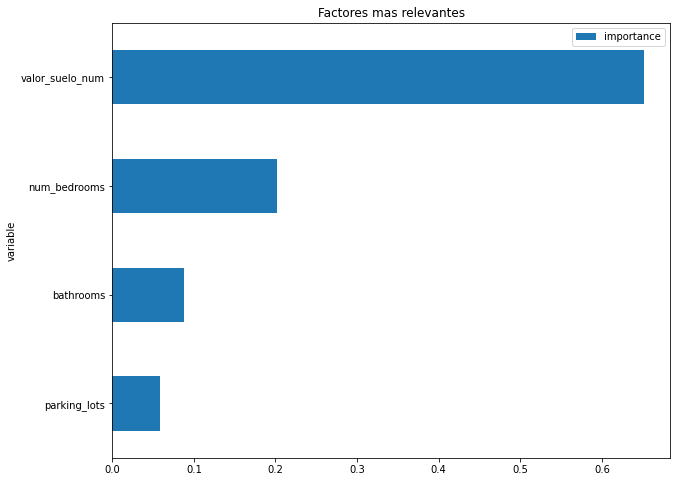

In [21]:
importance.plot.barh(x='variable', y='importance', title='Factores mas relevantes', figsize=(10,8));

## Calles donde están los inmuebles de mayor valor

Con al menos 5 inmuebles en esa calle

In [22]:
df_summ2 = Utilerias.save_load_objects('../DD360/data/df_summ2',None,'load')

In [23]:
df_summ2[df_summ2['cantidad']>5].head(10)

,calle,cantidad,media_precio
62,Calle Puebla,13,79928.611693
82,Calle Tonalá,22,73385.847731
28,Calle Colima,124,72036.620114
6,Avenida Insurgentes Sur,13,72005.872963
72,Calle San Luis Potosí,15,70762.374883
24,Calle Chiapas,11,70176.720942
23,Calle Bajío,27,66240.094398
12,Avenida Querétaro,23,66000.426525
3,Avenida Chapultepec,7,64731.526296
95,Ciclovía Monterrey,15,64348.413658


# Analisis a restaurantes

In [25]:
df_r = pd.read_csv('../DD360/data/places_details.csv')

In [40]:
geometry2 = gpd.points_from_xy(df_r.longitude, df_r.latitude)
geo_df2 = gpd.GeoDataFrame(df_r, geometry=geometry2)

map2 = folium.Map(location = [19.432608,-99.133209], tiles='Stamen Terrain', zoom_start = 11)
heat_data2 = [[point.xy[1][0], point.xy[0][0]] for point in geo_df2.geometry ]

heat_data2
plugins.FastMarkerCluster(heat_data2).add_to(map2)
map2

Entre los rating 4 y 5, los temas más relevantes son:
- Excelente lugar
- Comida deliciosa
- Buen servicio

A partir del rating 3, ya empieza a aparacer como tema relevante:
- Precio
- Un buen lugar pero caro
- Buen servicio
   
Para los ratings 1 y 2, los temas relevantes son:
- El precio
- Mala comida